In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [3]:
input_df = pd.read_csv("input/train.csv")

In [39]:
input_df.tail(20)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
144273,AFEC37C2D43F,1.617803e+12,693.0,710.0,"misunderstanding,",Claim,Claim 2,121
144274,AFEC37C2D43F,1.617803e+12,714.0,724.0,misdeed.,Claim,Claim 3,123
144275,AFEC37C2D43F,1.617803e+12,725.0,1360.0,While mistakes and misunderstanding might have...,Evidence,Evidence 1,124 125 126 127 128 129 130 131 132 133 134 13...
144276,AFEC37C2D43F,1.617803e+12,1361.0,1471.0,"The more similar iterations people give you, t...",Claim,Claim 4,234 235 236 237 238 239 240 241 242 243 244 24...
144277,AFEC37C2D43F,1.617803e+12,1472.0,1881.0,Misunderstandings are harder to avoid because ...,Evidence,Evidence 2,252 253 254 255 256 257 258 259 260 261 262 26...
144278,AFEC37C2D43F,1.617803e+12,1882.0,2019.0,The best thing to do in a situation like that ...,Claim,Claim 5,326 327 328 329 330 331 332 333 334 335 336 33...
144279,AFEC37C2D43F,1.617803e+12,2029.0,2123.0,misdeeds are when the advice-giver is purpose...,Claim,Claim 6,354 355 356 357 358 359 360 361 362 363 364 36...
144280,AFEC37C2D43F,1.617803e+12,2123.0,2702.0,An example of this is when you ask Generic_Nam...,Evidence,Evidence 3,368 369 370 371 372 373 374 375 376 377 378 37...
144281,AFEC37C2D43F,1.617803e+12,2703.0,2799.0,"Now, I know what you probably saying ""But what...",Counterclaim,Counterclaim 1,465 466 467 468 469 470 471 472 473 474 475 47...
144282,AFEC37C2D43F,1.617803e+12,2817.0,2907.0,what are the odds that seven of your close fr...,Rebuttal,Rebuttal 1,487 488 489 490 491 492 493 494 495 496 497 49...


In [51]:
#very interesting.  coded mistake, misunderstanding, and misdeed as three separate claims.
input_df.loc[input_df['id'] == 'AFEC37C2D43F',['discourse_text','discourse_type']]

,discourse_text,discourse_type
144270,There has been at least one point in everyone'...,Lead
144271,"Because of this, sometimes, asking just one pe...",Position
144272,"mistake,",Claim
144273,"misunderstanding,",Claim
144274,misdeed.,Claim
144275,While mistakes and misunderstanding might have...,Evidence
144276,"The more similar iterations people give you, t...",Claim
144277,Misunderstandings are harder to avoid because ...,Evidence
144278,The best thing to do in a situation like that ...,Claim
144279,misdeeds are when the advice-giver is purpose...,Claim


In [19]:
# Do discourses always divide by sentences?
last_char = lambda x: x[-3:]
input_df['discourse_text'].apply(last_char)

0          ng.
1          ne.
2          t. 
3          n. 
4          ms.
          ... 
144288    n.\n
144289     hat
144290     e. 
144291     ll.
144292        
Name: discourse_text, Length: 144293, dtype: object

In [24]:
input_df.iloc[-1,4]

'there are many other reasons one might want to seek multiple opinions and pieces of advice instead of just one, but these are the two main ones that I think really make it worthwhile to ask for advice from multiple people instead of making decisions with only one piece of advice from one person. The key thing that all of these examples have shown is that it is better to seek multiple opinions from multiple different people than to only get advice from one. This is ultimately because asking multiple people for advice makes you feel better about the decisions you make and also increases the chances that one or more of the people you consulted with gave you the right advice at the right time to empower you do what is right for you (or perhaps what is right for the country you happen to be in charge of!).\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \x

## Discourse type

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

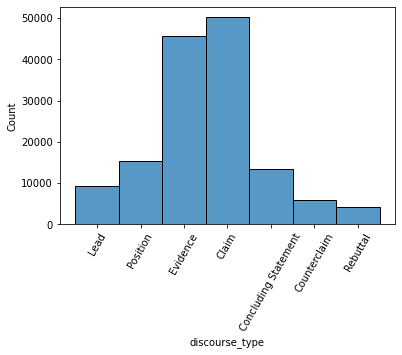

In [14]:
sns.histplot(input_df['discourse_type'])
plt.xticks(rotation=60)

In [13]:
input_df['discourse_type'].value_counts()

Claim                   50208
Evidence                45702
Position                15419
Concluding Statement    13505
Lead                     9305
Counterclaim             5817
Rebuttal                 4337
Name: discourse_type, dtype: int64

In [ ]:
#NOTE: in this case, the human scorer removed "Of course".  

# Pre-processing

In [ ]:
#need to watch out for typos: "achient Egypt"
#convert to lowercase

In [42]:
#remove trailing spaces and weird characters
input_df.iloc[144288,4]

' if I\'m not sure what college I want to attend, and I ask one friend where I should go, they might say "George\xa0Mason" as a suggestion. But if George Mason is not in fact the best college for me, even though the person I asked was trying to help, that one opinion could sway me to go there anyway and not have the best experience. But yet if I go to ten people to advice, including the person who suggested George Mason, they might be the only one who would say that and maybe five of the other people I asked might say Virginia Tech, and I would decide to go to Virginia Tech instead of to George\xa0Mason, and I would overall be happier and maybe even get better grades. Then I would be more successful because I went to multiple people before I made a decision that could affect my entire life. So therefore even though one person still has a chance to give valid advice, it is safer to talk to multiple people because it increases the chances of making a bad decision.\n'

## treat unicode data

In [36]:
unicodedata.normalize("NFKD", input_df.iloc[-1,4])

'there are many other reasons one might want to seek multiple opinions and pieces of advice instead of just one, but these are the two main ones that I think really make it worthwhile to ask for advice from multiple people instead of making decisions with only one piece of advice from one person. The key thing that all of these examples have shown is that it is better to seek multiple opinions from multiple different people than to only get advice from one. This is ultimately because asking multiple people for advice makes you feel better about the decisions you make and also increases the chances that one or more of the people you consulted with gave you the right advice at the right time to empower you do what is right for you (or perhaps what is right for the country you happen to be in charge of!).                                                                              '

In [ ]:
#for prediction:
#predict start and end of discourse
#then try to classify the given excerpt

#idea #2:
#divide text into clauses (separate on certain words, like 'for instance')
#classify each clause, then join together consecutive clauses with same classification
#for starters a clause can be a sentence
#more advanced approach can take classifications of previous clauses in as well